<a href="https://colab.research.google.com/github/PhanQuangTan/CS114.K21/blob/master/round3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Kết nối với thư mục Colab Notebook
# Nguồn: stackoverflow.com

In [2]:
%cd "/content/drive/My Drive/Colab Notebooks/" 

/content/drive/My Drive/Colab Notebooks


In [3]:
!pip install import-ipynb
import import_ipynb

  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-cp36-none-any.whl size=2976 sha256=ec3226a5a146ad36c246780476a2cf934b0211d4580ebdee72e04dffd925d14b
  Stored in directory: /root/.cache/pip/wheels/b4/7b/e9/a3a6e496115dffdb4e3085d0ae39ffe8a814eacc44bbf494b5
Successfully built import-ipynb


# Link data [link text](https://drive.google.com/drive/u/2/folders/1QWUvs-IIL2123I17TkNVzPR5aoFiqXJR)
# Tải file về google drive

In [0]:
import requests
file_url = 'https://cs.uit.edu.vn/data3.txt'
r = requests.get(file_url, stream = True)
with open('/content/drive/My Drive/Dataset/data3.txt', 'wb') as file:
  for block in r.iter_content(chunk_size = 1024):
    if block:
      file.write(block)

# Hàm paretxt từng dòng dữ liệu trong file
# # Nguồn Kaggle

In [0]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
def paretxt(fname):
  for line in open(fname, 'r'):
    yield eval(line)

In [0]:
file_name = '/content/drive/My Drive/Dataset/data3.txt'
data = list(paretxt(file_name))

In [52]:
df = pd.DataFrame(data)
df.columns=['size', 'time']
print(df)

           size     time
0      37837612  4.12166
1      37395246  3.92089
2      36610827  3.21540
3      29555651  2.54506
4      25928216  2.21831
...         ...      ...
10585  26872494  2.35117
10586  20753811  1.79155
10587  33520323  2.90918
10588  21243264  1.80292
10589  21380484  1.82795

[10590 rows x 2 columns]


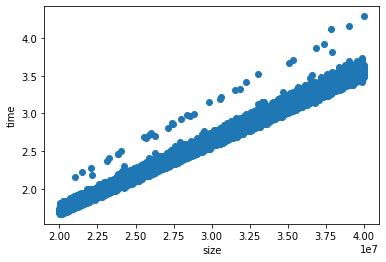

In [9]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.scatter(df['size'], df['time'])
plt.xlabel('size')
plt.ylabel('time')
plt.show()

In [81]:
X3 = df['size']
y3 = df['time']
print(X3)

0        37837612
1        37395246
2        36610827
3        29555651
4        25928216
           ...   
10585    26872494
10586    20753811
10587    33520323
10588    21243264
10589    21380484
Name: size, Length: 10590, dtype: int64


In [0]:
X3 = X3.values.reshape(-1, 1) 

In [83]:
import PredictTheTime as ptt
pred3 = ptt.regr.predict(X3)
print(pred3)

[3.1836499  3.14624313 3.07991213 ... 2.818577   1.78042053 1.79202395]


In [84]:
print('He so xac dinh: %.10f' % r2_score(y3, pred3))

He so xac dinh: 0.9284898234


# - Kết quả tệ hơn.
# - Vấn gặp phải overfitting. Vì data mới có nhiều dữ liệu nhiễu hơn làm giảm độ chính xác model.

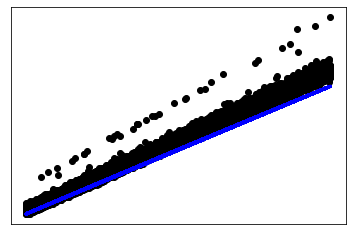

In [70]:
import matplotlib.pyplot as plt
plt.scatter(X3, y3,  color='black')
plt.plot(X3, pred_1, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [0]:
import math

In [57]:
df['size^2'] = df['size'] * df['size']
df['size*loge(size)'] = df['size']
a = []
a = df['size*loge(size)'] 
l = len(a)
for i in range(l):
  a[i] = a[i]*math.log(a[i])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [73]:
print(df)

           size     time  size*loge(size)            size^2
0      37837612  4.12166        660221461  1431684881862544
1      37395246  3.92089        652062929  1398404423400516
2      36610827  3.21540        637608838  1340352653623929
3      29555651  2.54506        508409969   873536506033801
4      25928216  2.21831        442616487   672272384942656
...         ...      ...              ...               ...
10585  26872494  2.35117        459697376   722130933780036
10586  20753811  1.79155        349665197   430720671023721
10587  33520323  2.90918        580828842  1123612054024329
10588  21243264  1.80292        358406799   451276265373696
10589  21380484  1.82795        360859575   457125096074256

[10590 rows x 4 columns]


In [0]:
X_3 = df[['size', 'size^2', 'size*loge(size)']]
y_3 = df['time']
X_3_train, X_3_test, y_3_train, y_3_test = train_test_split(X_3, y_3, test_size = 0.2, random_state = 0)

In [0]:
from sklearn import linear_model
regr_3 = linear_model.LinearRegression()

In [61]:
regr_3.fit(X_3_train, y_3_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
pred_3 = regr_3.predict(X_3_test)
print(pred_3)

[3.48753647 2.34232014 3.27200259 ... 2.38671623 2.43484742 1.80060221]


In [65]:
print('He So: \n', regr_3.coef_)
from sklearn.metrics import mean_squared_error, r2_score
print('Loi binh phuong: %.6f' % mean_squared_error(y_3_test, pred_3))


He So: 
 [ 6.48627007e-07  6.67353099e-16 -3.27337135e-08]
Loi binh phuong: 0.002978


In [85]:
print('He so xac dinh: %.10f' % r2_score(y3, pred3))
print('He so xac dinh: %.10f' % r2_score(y_3_test, pred_3))

He so xac dinh: 0.9284898234
He so xac dinh: 0.9897648045


# Model mới tốt hơn so với model cũ.
# Dataset ở round 3 có nhiều dữ liệu gây nhiễu nên khi dùng model ở round 2 dataset ở round 3 sẽ xảy ra hiện tượng overfitting khiến độ chính xác khi dự đoán giảm xuống khá nhiều (92,84%). Khi tăng số feature giúp tăng tương thích với model dự đoán và giúp cải thiện độ chính xác của model của mô hình dự đoán cũ.